In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
import arff as arf

In [4]:
file = open("C:\\Users\\Krishnashis Ganguly\\Documents\\IT-7th Sem Subjects\\Projects-II\\Implementation\\final-dataset.arff")
decoder = arf.ArffDecoder()
data = decoder.decode(file,encode_nominal=True)

In [5]:
vals = [val[0:-1] for val in data['data']]
labels = [lab[-1] for lab in data['data']]

In [6]:
da = set(labels)
brac = 600
templ = []
tempd = []
for i in da:
    coun=0
    while coun<brac:
        for j in range(len(labels)):
            if  labels[j]:
                templ.append(labels[j])
                tempd.append(vals[j])
                coun+=1
            if  coun==brac:
                break
vals = tempd
labels = templ

In [7]:
l=len(vals) # total datasize
print(l)

3000


In [8]:
X_train,X_test, Y_train, Y_test = train_test_split(vals,labels,stratify=labels,test_size=0.2,random_state=0)

In [9]:
scaler = StandardScaler()
x_train = scaler.fit_transform(X_train)
x_test = scaler.transform(X_test)
y_train = np.array(Y_train)
y_test = np.array(Y_test)

In [10]:
model = SVC(kernel='sigmoid', gamma = 'auto')
model.fit(x_train,y_train)

SVC(gamma='auto', kernel='sigmoid')

In [11]:
y_pred=model.predict(x_test)

In [12]:
print((accuracy_score(y_pred,y_test))*100,"%")

88.66666666666667 %


In [13]:
model1= KNeighborsClassifier(n_neighbors = 20)
model1.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=20)

In [14]:
y_pred1 =model1.predict(x_test)

In [15]:
print((accuracy_score(y_pred1,y_test))*100,"%")

95.16666666666667 %


In [16]:
model2= GaussianNB()
model2.fit(x_train,y_train)

GaussianNB()

In [17]:
y_pred2= model2.predict(x_test)

In [18]:
print((accuracy_score(y_pred2,y_test))*100,"%")

90.16666666666666 %


In [19]:
train_x,val_x,train_y,val_y=train_test_split(x_train,y_train,stratify=y_train,test_size=0.2,random_state=0)

In [20]:
print(x_train.shape,x_test.shape)

(2400, 27) (600, 27)


In [21]:
columns = ['SRC_ADD', 'DES_ADD', 'PKT_ID', 'FROM_NODE', 'TO_NODE', 'PKT_TYPE', 
           'PKT_SIZE', 'FLAGS', 'FID', 'SEQ_NUMBER', 'NUMBER_OF_PKT', 
           'NUMBER_OF_BYTE', 'NODE_NAME_FROM', 'NODE_NAME_TO', 'PKT_IN', 'PKT_OUT', 
           'PKT_R', 'PKT_DELAY_NODE', 'PKT_RATE', 'BYTE_RATE', 'PKT_AVG_SIZE', 
           'UTILIZATION', 'PKT_DELAY', 'PKT_SEND_TIME', 'PKT_RESEVED_TIME', 
           'FIRST_PKT_SENT', 'LAST_PKT_RESEVED']

In [22]:
model1 = SVC(kernel='sigmoid', gamma = 'auto')
model1.fit(train_x,train_y)
y_val_pred1=model1.predict(val_x)
y_val_pred1=pd.DataFrame(y_val_pred1)
y_test_pred1=model1.predict(x_test)
y_test_pred1=pd.DataFrame(y_test_pred1)

In [23]:
model2 = KNeighborsClassifier(n_neighbors=5)
model2.fit(train_x,train_y)
y_val_pred2=model2.predict(val_x)
y_val_pred2=pd.DataFrame(y_val_pred2)
y_test_pred2=model2.predict(x_test)
y_test_pred2=pd.DataFrame(y_test_pred2)

In [24]:
model3 = GaussianNB()
model3.fit(train_x,train_y)
y_val_pred3=model3.predict(val_x)
y_val_pred3=pd.DataFrame(y_val_pred3)
y_test_pred3=model3.predict(x_test)
y_test_pred3=pd.DataFrame(y_test_pred3)

In [25]:
val_input=pd.concat([pd.DataFrame(val_x,columns=columns),y_val_pred1,y_val_pred2,y_val_pred3],axis=1)
test_input=pd.concat([pd.DataFrame(x_test,columns=columns),y_test_pred1,y_test_pred2,y_test_pred3],axis=1) 

In [26]:
val_input.columns = val_input.columns.astype(str)
test_input.columns = test_input.columns.astype(str)

In [27]:
model=RandomForestClassifier(n_estimators=200)
model.fit(val_input,val_y)

RandomForestClassifier(n_estimators=200)

In [28]:
y_pred3=model.predict(test_input)

In [29]:
print((model.score(test_input,y_test))*100,"%")

97.5 %


In [30]:
from sklearn.metrics import confusion_matrix
y_pred4= model.predict(test_input)
cm= confusion_matrix(y_test,y_pred4)
cm

array([[519,   9,   0,   0],
       [  6,  30,   0,   0],
       [  0,   0,  21,   0],
       [  0,   0,   0,  15]], dtype=int64)

Text(58.222222222222214, 0.5, 'Truth')

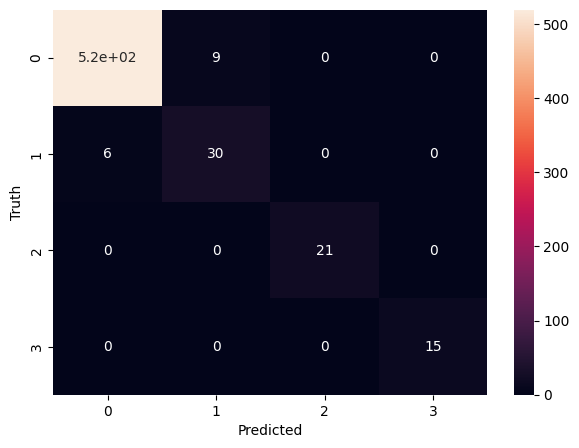

In [31]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(7,5))
sn.heatmap(cm,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")